# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

## 1. Reading Data using Panda

In [35]:
# conventional way to import pandas
import pandas as pd

In [36]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')


# display the first 5 rows
#data.head()
data['TV'].head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [37]:
# display the last 5 rows
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [38]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
print data.shape


(200, 5)


What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a **regression problem**.
There are 200 observations (represented by the rows), and each observation is a single market.


## 2. Visualizing Data

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

In [39]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

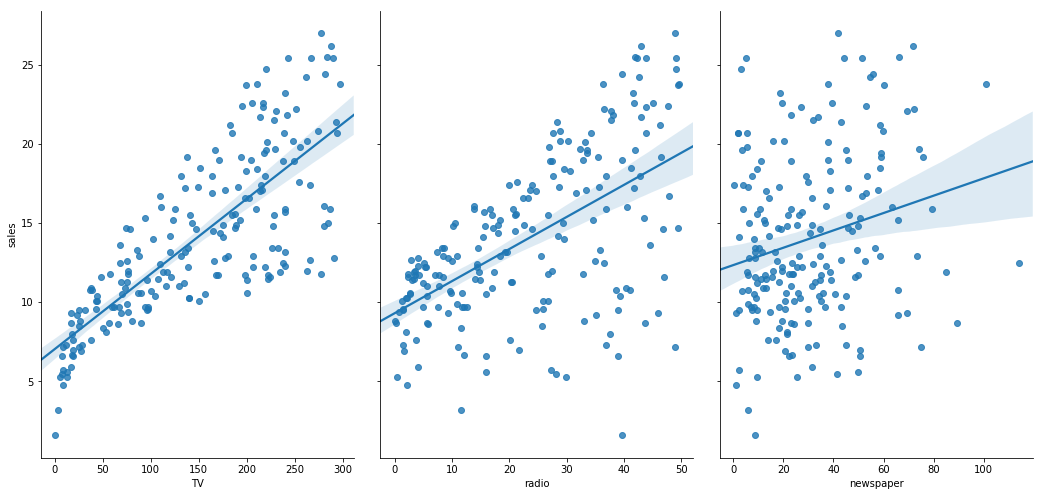

In [40]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

## 3. Computing Linear Regression (Scikit-learn)

## Form of linear regression
$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  is the response
- $\theta_0$  is the intercept
- In this case:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper$$


scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
However, pandas is built on top of NumPy
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [41]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]
# print the first 5 rows
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [43]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [44]:
# import  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# default split is 75% for training and 25% for testing
print type(X_train)
print type(y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print len(X_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 3)
(50, 3)
(150,)
(50,)
150


## Linear Regression

In [46]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Excercise 1 
Try your own linear regression algorithm 

### Implementation of batch gradient descent and least squares

In [47]:
import numpy as np
from sklearn import metrics

def get_numpy_data(data_frame, output_serie, features_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features_name = ['constant'] + features_name # this is how you combine two lists    
    
    # select the columns of data_Frame given by the features list into the Frame features_frame (now including constant):    
    features_frame = pd.core.frame.DataFrame()    
    for feature_name in features_name:
        features_frame[feature_name] = data_frame_copy[feature_name]
        
    # convert the features_Frame and output_serie into a numpy matrix and vector respectively:
    feature_matrix = features_frame.values
    output_array = output_serie.values
    return(feature_matrix, output_array)

def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)  # y hat

def feature_derivative(errors, feature):
    derivative = np.dot(errors,feature)
    return(derivative)
    

In [48]:
def regression_batch_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance , num_steps):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    cont = 0
    while cont < num_steps and not converged :
        
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output  #### trick for not multiplying by -2, just by 2, the error = y - y_hat
        
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # compute the derivative for weight[i]:            
            derivative = feature_derivative(errors, feature_matrix[:, i])
            
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i]  - step_size*derivative
            
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)   
            gradient_sum_squares += derivative*derivative
            
        
        gradient_magnitude = np.sqrt(gradient_sum_squares) # norm 2 of the gradient of the RSS
        
        if gradient_magnitude < tolerance:
            converged = True        
        
        cont+=1
        
    
    print "gradient magnitude: " + str(gradient_magnitude)
    print "iterations        : "+ str(cont) + "\n"
    return(weights)


def regression_closedform_gradient_descent(feature_matrix, output):
    a = np.linalg.inv(np.dot(feature_matrix.transpose(), feature_matrix))
    b = feature_matrix.transpose().dot(output)
    weights = np.dot(a,b)
    return weights

In [49]:
#Test 1
feature_matrix = np.array([ [1, 0], [1, 1], [1, 2], [1, 3], [1, 4] ])
output = np.array([1, 3, 7, 13, 21])

step_size = 5e-2
tolerance = 1e-2

multiple_coefficients = regression_batch_gradient_descent(feature_matrix, output, [0.,0.], step_size, tolerance,  1000) 
print multiple_coefficients

gradient magnitude: 0.00989926207146
iterations        : 78

[-0.99420698  4.99796792]


Generate feature_matrix and output

In [50]:
model_features_name = ['TV', 'radio', 'newspaper']

(feature_matrix, output) = get_numpy_data(X_train, y_train, model_features_name)

print feature_matrix[0:10]
print output[0:10]
X_train.head()

[[   1.   289.7   42.3   51.2]
 [   1.   123.1   34.6   12.4]
 [   1.    19.4   16.    22.3]
 [   1.   182.6   46.2   58.7]
 [   1.   265.6   20.     0.3]
 [   1.   165.6   10.    17.6]
 [   1.   218.5    5.4   27.4]
 [   1.    25.    11.    29.7]
 [   1.   232.1    8.6    8.7]
 [   1.    43.    25.9   20.5]]
[ 25.4  15.2   6.6  21.2  17.4  12.6  12.2   7.2  13.4   9.6]


,TV,radio,newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4
119,19.4,16.0,22.3
53,182.6,46.2,58.7
33,265.6,20.0,0.3


**Batch Gradient Descent**

In [51]:
tolerance = 1e-1
#initial_weights = np.array(np.zeros(len(model_features_name)+1))
initial_weights = np.array([2., 0., 0., 0.])
step_size = 1e-7
multiple_coefficients = regression_batch_gradient_descent(feature_matrix, output, initial_weights, step_size,tolerance, 50000) 

print "coefficients"
print multiple_coefficients

(feature_matrix_test, output_test) = get_numpy_data(X_test, y_test, model_features_name)
predictions_test_data = predict_output(feature_matrix_test, multiple_coefficients)

print ""
print "RMSE"
print(np.sqrt(metrics.mean_squared_error(output_test, predictions_test_data)))

gradient magnitude: 18.2330947122
iterations        : 50000

coefficients
[ 2.09907492  0.04871443  0.18809044  0.00819953]

RMSE
1.44892648302


**Closed form Gradient Descent (least squares):**

In [52]:
batch_multiple_coefficients = regression_closedform_gradient_descent(feature_matrix, output)

print "coefficients"
print batch_multiple_coefficients

predictions_test_data = predict_output(feature_matrix_test, batch_multiple_coefficients)

print ""
print "RMSE"
print(np.sqrt(metrics.mean_squared_error(output_test, predictions_test_data)))

coefficients
[ 2.87696662  0.04656457  0.17915812  0.00345046]

RMSE
1.40465142303


## Interpreting model coefficients

In [53]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

#2.87696662232
#[ 0.04656457  0.17915812  0.00345046]

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [54]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804065)]

$$ y= 2.88 +0.0466 \times TV+0.179 \times radio + 0.00345 \times Newspaper $$
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.


## Making Predictions

In [55]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values.

## 4. Model evaluation metrics for regression

we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:


In [56]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

In [57]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

In [58]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

In [59]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [61]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print linreg.intercept_
print linreg.coef_

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.92723732027
[ 0.04660234  0.18117959]
1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [62]:
## Excercise 2, try nonlinear features and measure the RMSE

create nonlinear features

In [63]:
#if we add more polynomial degree to features we fall on overfitting
data['TV_quare'] = data['TV']*data['TV']
data['radio_TV'] = data['TV']*data['radio']

Split and train data, and measure the RSME

In [64]:
# create a Python list of feature names
feature_cols = ['TV', 'radio','TV_quare', 'radio_TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print "Intercept"
print linreg.intercept_
print "Coefficient"
print linreg.coef_

# compute the RMSE of our predictions
print "RMSE:"
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept
5.10507094218
Coefficient
[ 0.05223404  0.03247976 -0.00011515  0.00109533]
RMSE:
0.432472741092


In [65]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Generating nonliniar features with sklearn we get almost the same RMSE:

**sklearn.preprocessing.PolynomialFeatures**

Generate polynomial and interaction features.
Generate a new feature matrix consisting of **all polynomial combinations of the features with degree less than or equal to the specified degree**. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are:

[1, a, b, a^2, ab, b^2].

In [69]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)

#Transform data to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.fit_transform(X_test)


In [67]:
# Instantiate
poly_model = LinearRegression()

# Fit
poly_model.fit(X_train_poly, y_train)

# Obtain coefficients
poly_model.coef_

array([ 0.        ,  0.05229085,  0.02266438, -0.00011518,  0.00109361,
        0.00021043])

In [68]:
# make predictions on the testing set
y_pred_poly = poly_model.predict(X_test_poly)

# compute the RMSE of our predictions
print "RMSE:"
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

RMSE:
0.432169418373
